## point 4.1

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pyedflib
import re

def motif_analysis(filename):
    
    # read the file
    
    file = open(filename, 'r', encoding='utf8')
    f = ''
    for row  in file: 
        f += row
    
    columns = ['ID', 'Frequency', 'Statistical Significance']
    dictionary = {c: [] for c in columns}
    intervals = []

    l = f.split('Full list of subgraphs size 3 ids:')[1].split('\n')
    
    for row in l:
        #print(row)
        if '+-' in row:
            dictionary[columns[0]] += [int(row.split()[0])]
            dictionary[columns[1]] += [int(row.split()[1])]
            intervals += [row.split()[2]]
            #print(intervals)

    intervals = [[float(i.split('+-')[0])-float(i.split('+-')[1]), float(i.split('+-')[0])+float(i.split('+-')[1])] 
                 for i in intervals]
    #print()
    #print(intervals)
    
    for i in range(13):
        if dictionary['Frequency'][i] > intervals[i][1]:
            dictionary['Statistical Significance'] += ['motif']
        elif dictionary['Frequency'][i] < intervals[i][0]:
            dictionary['Statistical Significance'] += ['anti-motif']
        else:
            dictionary['Statistical Significance'] += ['no significant']

    dictionary = pd.DataFrame(dictionary, columns = columns)
    return(dictionary)

In [5]:
path = 'C:/Users/valer/Downloads/mfinder1.2/mfinder1.2/'
files = ['output_exmp.txt']
d = []

# For this moment we have only a file, i.e. 'output_exmp.txt'. 
# We need to change the files and add the pdc of the opened eyes graph and the pdc of the closed eyes

for f in files:
    d += [motif_analysis(path+f)]

In [6]:
d

[     ID  Frequency Statistical Significance
 0     6          3               anti-motif
 1    12         10               anti-motif
 2    14          0           no significant
 3    36          3               anti-motif
 4    38          5                    motif
 5    46          0           no significant
 6    74          0           no significant
 7    78          0           no significant
 8    98          0           no significant
 9   102          0           no significant
 10  108          0           no significant
 11  110          0           no significant
 12  238          0           no significant]

## point 4.2

In [7]:
# pd.read_csv('channel_locations.txt', sep='\t')

In [8]:
def edges_function(filename):
    file = open(filename, 'r')
    f = ''
    for row  in file: 
        f += row
    
    edges = []

    for m in f.split('\n'):
        if '\t' in m:
            edges += [(int(m.split('\t')[0]),int(m.split('\t')[2]))]
            edges += [(int(m.split('\t')[1]),int(m.split('\t')[2]))]
    return(edges)

In [9]:
files = ['network_exmp_MEMBERS.txt']
edges_list = []

for f in files:
    edges_list += [edges_function(path+f)]

In [17]:
import pyedflib
import numpy as np

def signal_matrix_from_eeg(filename):
    """
    A method to obtain the (k, N) data point matrix of signals using the pyedflib package.
    Args:
        *filename*: str
            The filename to open.
    Returns:
        *sigbufs*: np.array
            A (k, N) matrix representing k channels and N samples.
        *frequency*: int
            The sample frequency of the given data.
        *signal_labels*: [str]
            The channel labels of the given data.
    References:
    .. [1] The PyEDFlib package. To read EDF+/BDF+ files.
           http://pyedflib.readthedocs.io/en/latest/#
    """
    f = pyedflib.EdfReader(filename)
    
    k, N = f.signals_in_file, f.getNSamples()[0]
    
    sigbufs = np.zeros((k, N, 1))
    for i in np.arange(k):
        sigbufs[i, :, 0] = f.readSignal(i)
        
    return sigbufs, f.getSampleFrequency(0), f.getSignalLabels()

In [18]:
signal_open, frequency_open, names_open = signal_matrix_from_eeg(filename='bio_data/S038R01.edf')
signal_closed, frequency_closed, names_closed = signal_matrix_from_eeg(filename='bio_data/S038R02.edf')

In [24]:
signal_open.shape

(64, 9760)

In [25]:
edges_list

[[(3, 13), (5, 13), (4, 10), (5, 10), (4, 10), (6, 10)]]

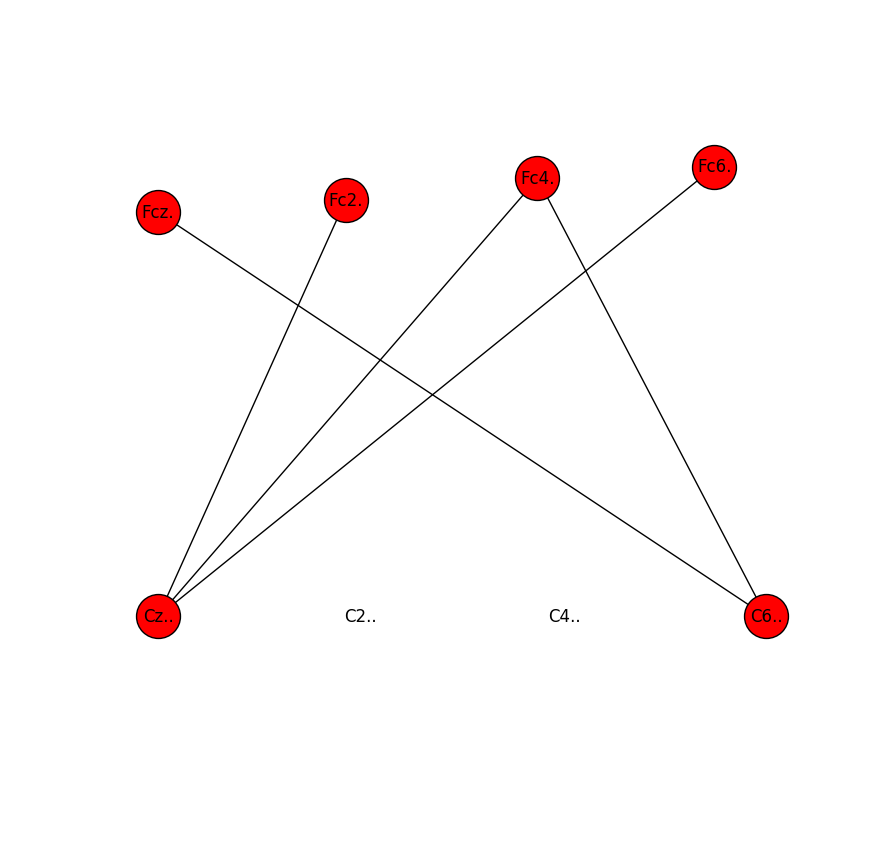

In [34]:
channel_locations = pd.read_csv('channel_locations.txt', sep='\t')
pos = {n: (channel_locations['x'][n],channel_locations['y'][n]) for n in range(64)}

plt.figure(figsize=(8, 8))

# plt.subplot(221)
G=nx.Graph()
G.add_edges_from(edges_list[0])
labels = {i: names_open[i] for i in range(len(names_open))}
nx.draw(G, pos, node_size = 1000)
nx.draw_networkx_labels(G, pos, labels)


# plt.subplot(222)
# G=nx.Graph()
# G.add_edges_from(edges_list[1])
# labels = {i: names_open[i] for i in range(len(names_open))}
# nx.draw(G, pos, node_size = 1000)
# nx.draw_networkx_labels(G, pos, labels)


plt.show()

### point 4.3 